<a href="https://colab.research.google.com/github/mghendi/pokeroddscalculator/blob/main/Poker_Odds_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poker Odds Calculator

Samuel Mwamburi Mghendi - P52/37621/2020 - mghendi@students.uonbi.ac.ke 

This report is organised as follows.


### 1.   Problem Statement

### 2.   Data Description
*   Data Loading and Preparation
*   Exploratory Data Analysis

### 3.   Data Preprocessing and Modelling
*   Data Preprocessing
*   Modelling

### 4.   Model Evaluation

### 5.   Conclusion

# 1.   Problem Statement



Poker is a simple game that is played globally. It requires at least 2 players and a standard deck of cards. A deck of cards has 52 cards (not including the 2 Jokers), and those 52 cards are divided into 4 suits namely Hearts, Diamonds, Spades, and Clubs. Hearts and Diamonds are red while Spades and Clubs are black. Each suit consists of 13 cards as follows: - Ace (lowest ranking) - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - Jack - Queen - King (highest ranking) 
A poker hand is a combination of 5 cards that determines whether the game is won or not. There are many types of poker hands. For this dataset, we will look at the following hands: - 0 : Nothing in hand; not a recognized poker hand - 1 : One pair; one pair of equal ranks within five cards - 2 : Two pairs; two pairs of equal ranks within five cards - 3 : Three of a kind; three equal ranks within five cards - 4 : Straight; five cards, sequentially ranked with no gaps - 5 : Flush; five cards with the same suit - 6 : Full house; pair + different rank three of a kind - 7 : Four of a kind; four equal ranks within five cards - 8 : Straight flush; straight + flush - 9 : Royal flush; {Ace, King, Queen, Jack, Ten} + flush 
.


This experiment intends to leverage the power of Artificial Neural Networks (NN) in order to demonstrate and classify a poker hand based on five cards.


# 2.   Data Description

This is a brief description of the data set explaining the significance of the independent and dependent  variable(s) to the problem. 



###  Data Loading and Preparation

Here we will load the data and the relevant libraries, and work towards making sure that the data is ready for analysis and modeling.

In [ ]:
#Ensure Notebook remains clean from unnecessary warning messages
import warnings
warnings.filterwarnings('ignore')

# load libraries
import pandas as pd
import numpy as np

import os
try:
    import theano
except:
    !pip install Theano
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# load dataset
df = pd.read_csv("poker-hand-training.csv")
df.sample(3)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
16506,3,8,1,6,4,1,3,3,4,6,1
23876,1,6,4,3,3,11,3,6,3,3,2
7613,4,2,3,1,1,10,1,7,1,12,0


In [ ]:
# check shape
df.shape

(25010, 11)

Our dataset has 25,010 records and 11 features.

In [ ]:
# remove duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(25008, 11)

Two duplicate records have been removed.

In [ ]:
df["Poker Hand"].value_counts(normalize= True)

0    0.499560
1    0.423744
2    0.048225
3    0.020513
4    0.003719
5    0.002159
6    0.001440
7    0.000240
9    0.000200
8    0.000200
Name: Poker Hand, dtype: float64

In [ ]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25008 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   S1          25008 non-null  int64
 1   C1          25008 non-null  int64
 2   S2          25008 non-null  int64
 3   C2          25008 non-null  int64
 4   S3          25008 non-null  int64
 5   C3          25008 non-null  int64
 6   S4          25008 non-null  int64
 7   C4          25008 non-null  int64
 8   S5          25008 non-null  int64
 9   C5          25008 non-null  int64
 10  Poker Hand  25008 non-null  int64
dtypes: int64(11)
memory usage: 2.3 MB


There are no missing values.

### Exploratory Data Analysis
This is where we gather more information about the data that can help us to better understand it.


In [ ]:
df.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Hand']
df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


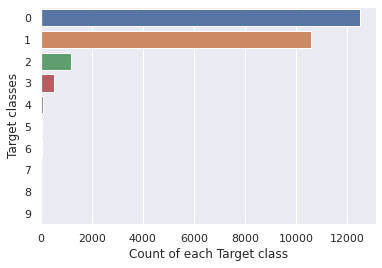

In [ ]:
sns.countplot(y=df.Hand ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

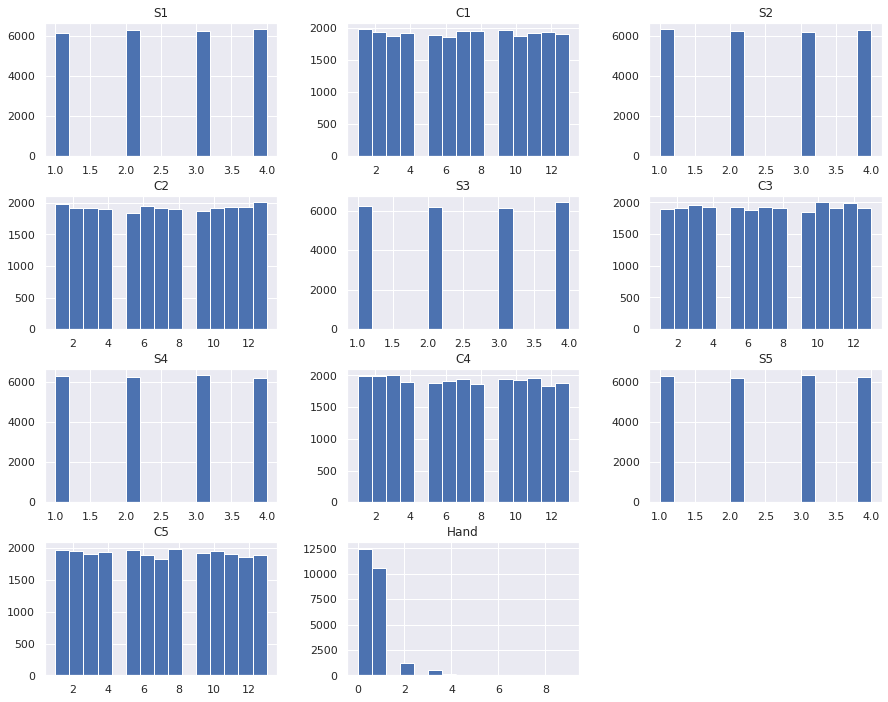

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution", fontsize=12, fontweight="bold");
plt.show()

 
*   At 12,000 samples for Hand 0 and about 10,000 samples for Hand 1, this dataset is biased between the first two poker hands.

# 3.   Data Pre-processing

###Data Modeling for Artificial Neural Networks


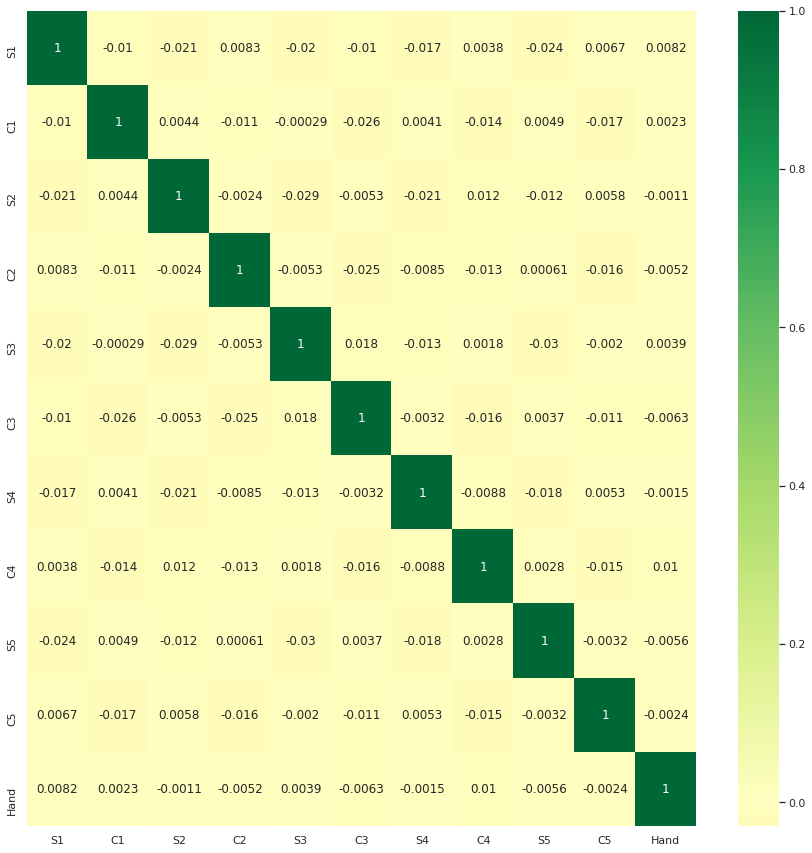

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)

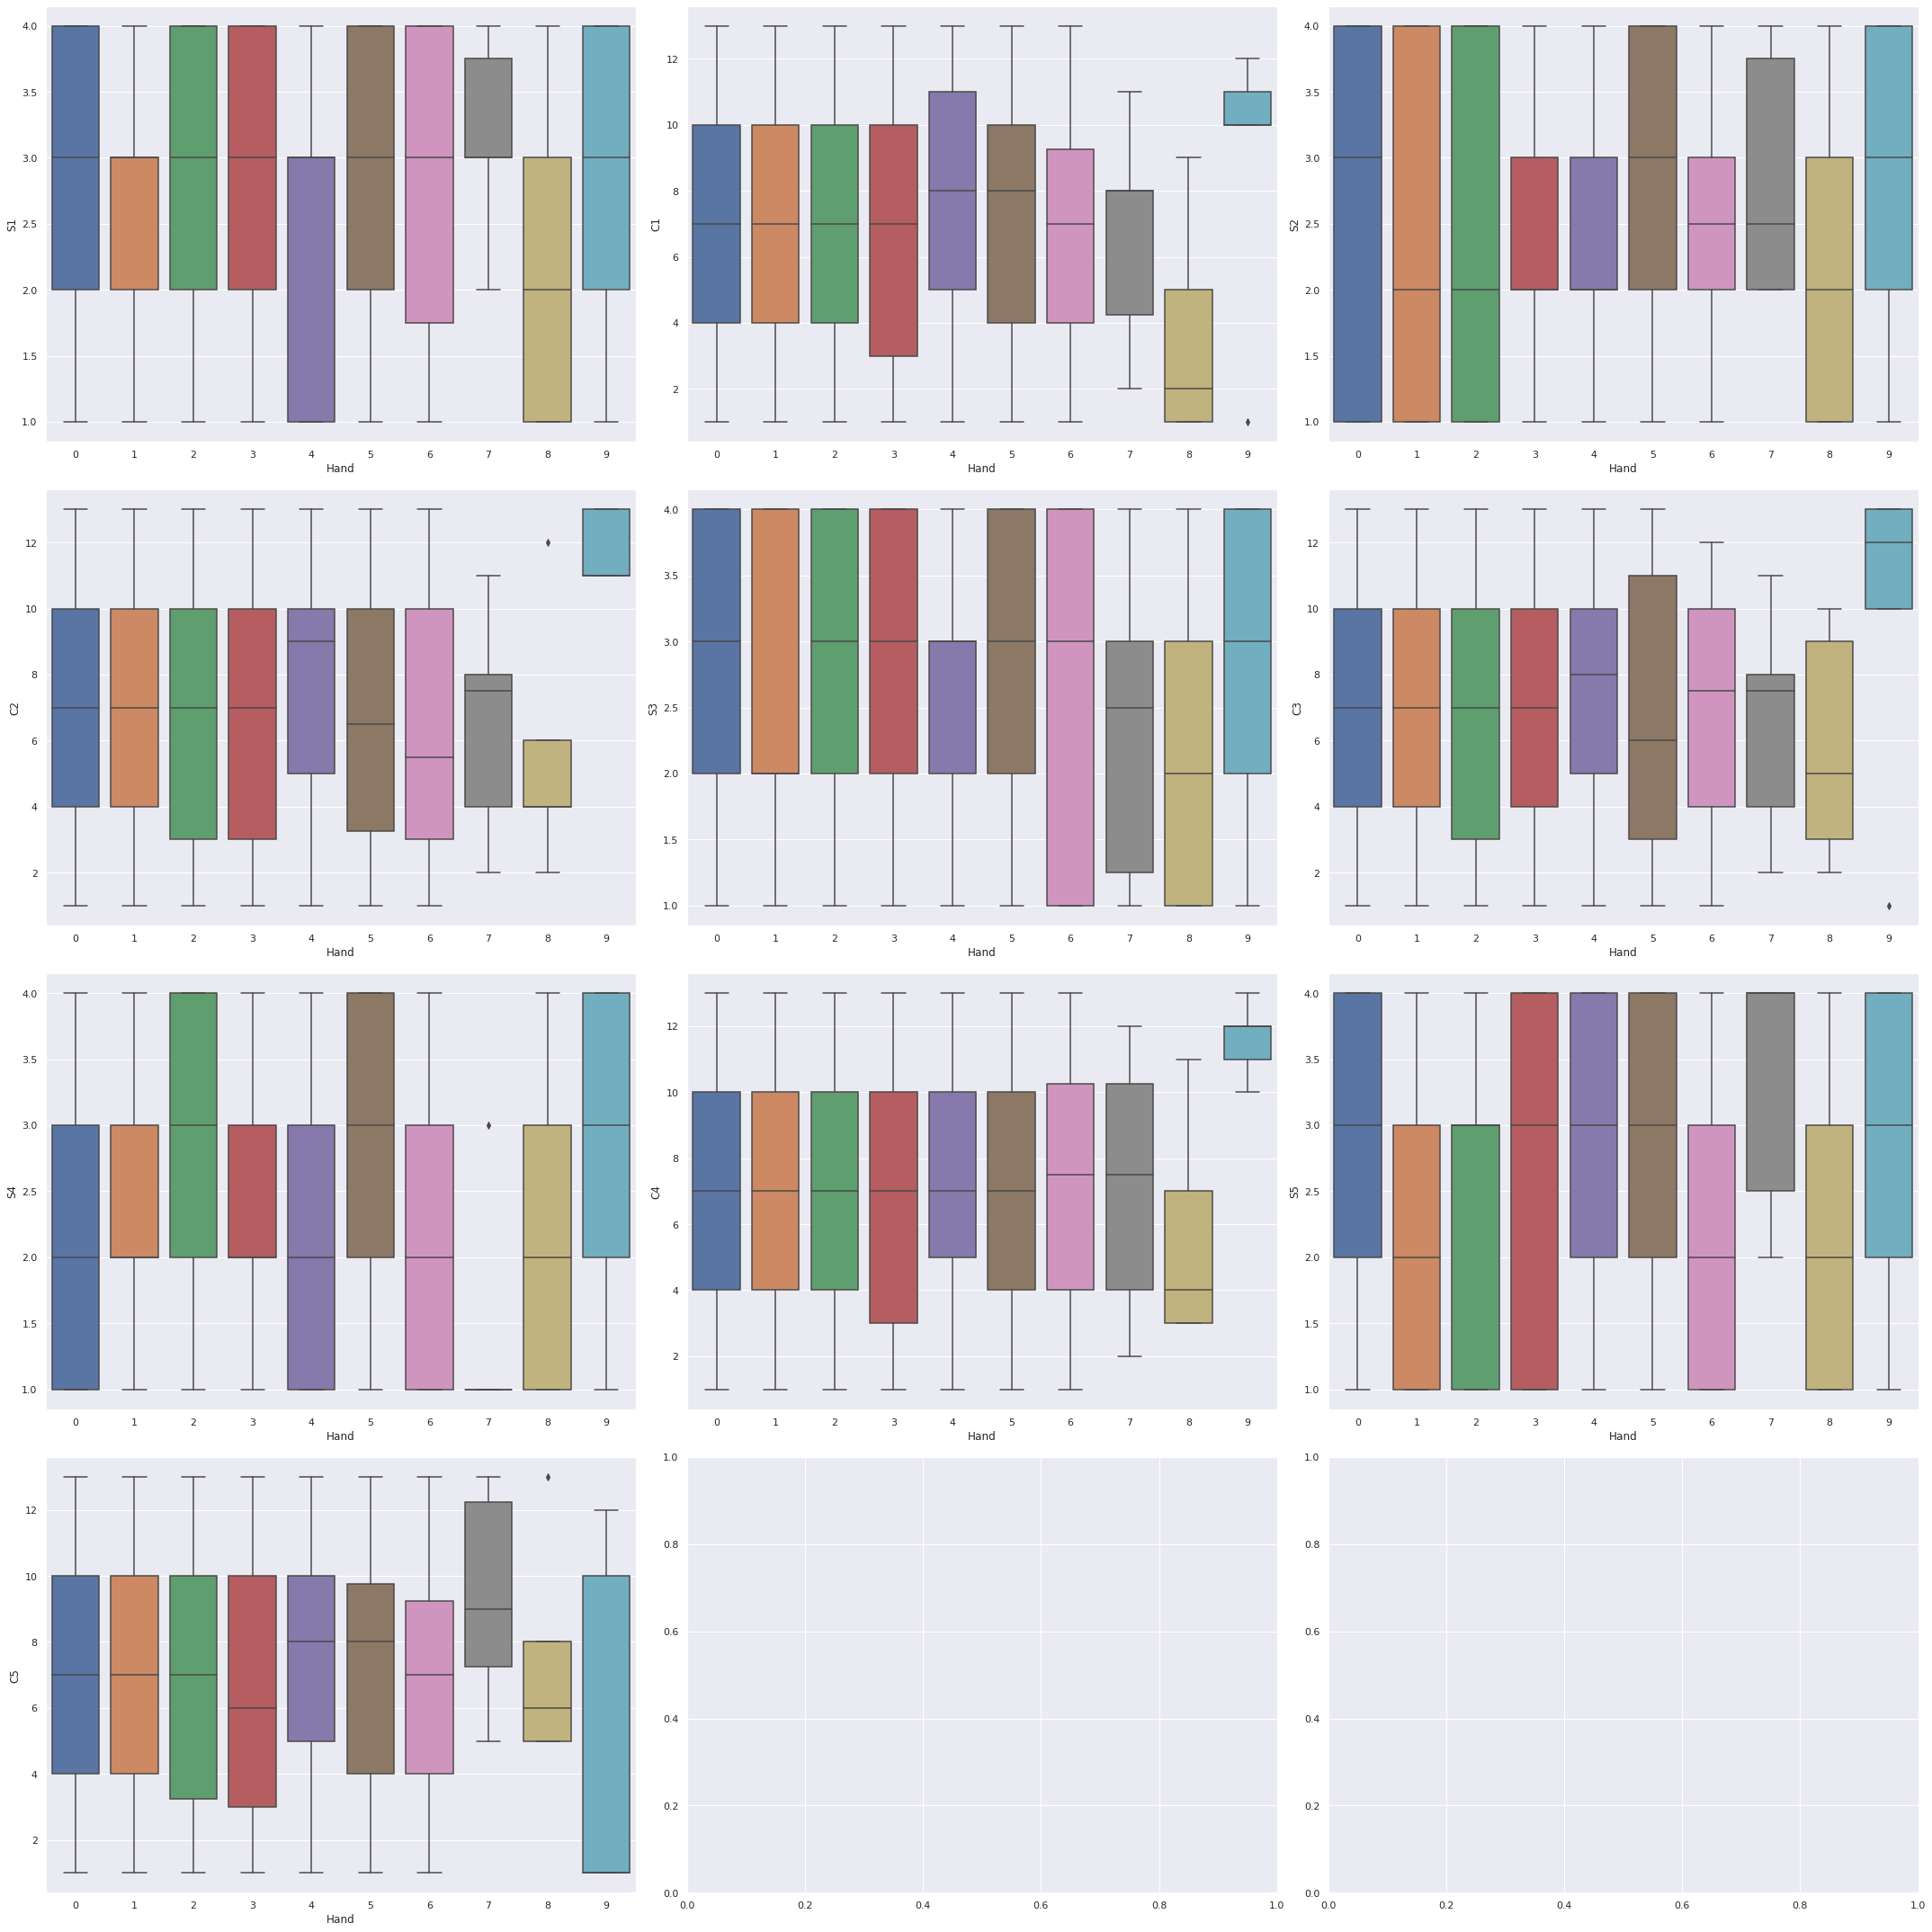

In [ ]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Hand'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [ ]:
X = df.drop(['Hand'],axis=1)
y = df.Hand

In [ ]:
X.head(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
5,1,2,1,4,1,5,1,3,1,6
6,1,9,1,12,1,10,1,11,1,13
7,2,1,2,2,2,3,2,4,2,5
8,3,5,3,6,3,9,3,7,3,8
9,4,1,4,4,4,2,4,3,4,5


###Modeling

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

Neural Network is a broad term that encompases various types of networks modelled against the human-brain, to replicate the way humans learn. Artificial Neural Networks (ANNs) are one such example, and are characterised by three layers: the input and output layers, as well as a hidden layer of units that transform the input into a format usable by the output layer.

*input_dim - number of columns of the dataset*

output_dim - number of outputs to be fed to the next layer

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.6704 - accuracy: 0.4290
Epoch 2/100
1676/1676 [==============================] - 2s 984us/step - loss: 0.6139 - accuracy: 0.4270
Epoch 3/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5908 - accuracy: 0.4807
Epoch 4/100
1676/1676 [==============================] - 2s 986us/step - loss: 0.5677 - accuracy: 0.5141
Epoch 5/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5593 - accuracy: 0.5284
Epoch 6/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5480 - accuracy: 0.5316
Epoch 7/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5502 - accuracy: 0.5287
Epoch 8/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5217 - accuracy: 0.4395
Epoch 9/100
1676/1676 [==============================] - 2s 1ms/step - loss: 0.5253 - accuracy: 0.4205
Epoch 10/100
1676/1676 [==============================] - 2s 1ms/step

In [ ]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

1676/1676 [==============================] - 2s 922us/step - loss: -150.8472 - accuracy: 0.4260
Train score: -150.84715270996094
Train accuracy: 0.4259623885154724


# 4. Model Evaluation

### Making predictions and evaluating the model

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


********************
826/826 [==============================] - 1s 1ms/step - loss: -209.4098 - accuracy: 0.4192
Test score: -209.4097900390625
Test accuracy: 0.4192414879798889


Text(0.5, 12.5, 'Predicted label')

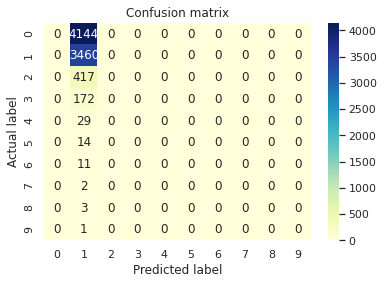

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4144
           1       0.42      1.00      0.59      3460
           2       0.00      0.00      0.00       417
           3       0.00      0.00      0.00       172
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

    accuracy                           0.42      8253
   macro avg       0.04      0.10      0.06      8253
weighted avg       0.18      0.42      0.25      8253



# 5. Conclusion



Artificial Neural Networks (ANN) are rarely used for predictive modelling as the algorithm will attempt to over-fit. The technique, however, thrives in cases where there are very clear patterns as it has enourmous memory beneficial for memorization. Dropout Regularization can be used to reduce overfitting.